In [1]:
import requests
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

url = 'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/GAZP.json'
params = {
    'iss.meta': 'off',
    'iss.only': 'history',
    'history.columns': 'TRADEDATE,CLOSE',
    'history.from': '252',
    'history.sort_order': 'TRADEDATE',
    'history.max_items': '252'
}
response = requests.get(url, params=params)
data = response.json()

price_history = data['history']['data']

df = pd.DataFrame(price_history, columns=['TRADEDATE', 'CLOSE'])
df.to_excel('GAZP_Price.xlsx', index=False)


In [2]:
prices = df["CLOSE"].values
returns=[0]

for i in range(1,len(prices)):
    returns.append((prices[i]-prices[i-1])/prices[i-1])
a = 0.99
T = 1  

VaR_long = -np.percentile(returns, a * 100)
VaR_short = -np.percentile(returns, (1 - a) * 100)

results = pd.DataFrame({"VAR_long": [VaR_long], "VAR_short": [VaR_short]})

results.to_excel("VAR.xlsx", index=False)


In [3]:
df['D']=returns
print(df)

     TRADEDATE   CLOSE         D
0   2014-06-09  144.40  0.000000
1   2014-06-10  144.75  0.002424
2   2014-06-11  146.40  0.011399
3   2014-06-16  145.20 -0.008197
4   2014-06-17  144.77 -0.002961
..         ...     ...       ...
95  2014-10-22  133.50 -0.003731
96  2014-10-23  133.50  0.000000
97  2014-10-24  133.99  0.003670
98  2014-10-27  134.07  0.000597
99  2014-10-28  135.75  0.012531

[100 rows x 3 columns]


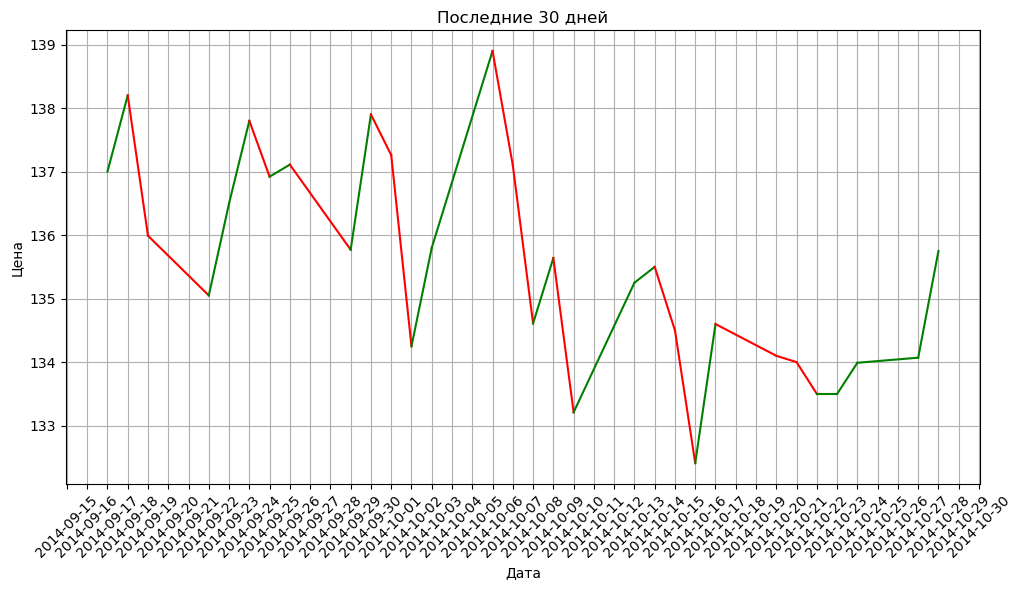

In [4]:


# Assuming the dataframe is named 'df'
df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])  # Convert TRADEDATE column to datetime format
df_last_30_days = df.tail(30)  # Select the last 30 days of data

plt.figure(figsize=(10, 6))

for i in range(1,len(df_last_30_days)):  # Use -1 to avoid connecting the last point to the first in the next loop
    colour = 'green' if df_last_30_days['D'].iloc[i] >= 0 else 'red'
    plt.plot([df_last_30_days['TRADEDATE'].iloc[i-1], df_last_30_days['TRADEDATE'].iloc[i]], 
             [df_last_30_days['CLOSE'].iloc[i-1], df_last_30_days['CLOSE'].iloc[i]], 
             color=colour, linestyle='-')

plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('Последние 30 дней')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Set tick frequency to display all 30 dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.savefig('Trend.pdf')
